In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
# Source: https://github.com/FlourishOA/FlourishOA/blob/master/static_data/APCdata_20170314.csv
df1 = pd.read_csv('APCdata_20170314.csv')
df1.head()

,journal_name,pub_name,journal_id,price,price_date_stamp,category
0,Acta Neuropathologica Communications,BioMed Central,2051-5960,1400,2016-08-11,NaN
1,Alzheimers Research & Therapy,BioMed Central Ltd,1758-9193,2175,2016-08-11,NEUROSCIENCE
2,Annals of Clinical Microbiology and Antimicrob...,BioMed Central Ltd,1476-0711,2145,2016-08-11,INFECTIOUS DISEASES
3,Antimicrobial Resistance & Infection Control,BioMed Central,2047-2994,2145,2016-08-11,NaN
4,Behavioral and Brain Functions,Biomed Central,1744-9081,2145,2016-08-11,NEUROSCIENCE


In [3]:
# Source: https://github.com/FlourishOA/Data/blob/master/api_journal11-13-17.csv
# Gives some error while encoding with utf-8, so encoding way changed to below
df2 = pd.read_csv('api_journal11-13-17.csv', encoding='ISO-8859-1')
df2.sample(5)

,issn,journal_name,pub_name,is_hybrid,category,url
12307,2443-2512,Ta'dib,Universitas Islam Negeri Raden Fatah Palembang,0,Education,http://jurnal.radenfatah.ac.id/index.php/tadib
10293,2321-595X,International Journal of Scientific Study,Medical Students Association of India,0,Science,http://www.ijss-sn.com/index.html
11370,2373-2156,Journal of Physical Education and Sports Manag...,American Research Institute for Policy Develop...,0,NaN,NaN
9432,2289-5639,Intellectual Discourse,"IIUM Press, International Islamic University M...",0,Philosophy. Psychology. Religion,http://journals.iium.edu.my/intdiscourse/
3775,1759-0914,ASN Neuro,PORTLAND PRESS LTD,0,NEUROSCIENCE,NaN


In [4]:
# Source: https://data.world/flourishoa/flourish-oa-exploratory-analysis/workspace/file?datasetid=estimatedarticle-influence-scores2015&filename=estimated_article-influence-scores_2015.csv
df3 = pd.read_csv('estimated-article-influence-scores-2015.csv')
df3.sample(5)

,Unnamed: 0,journal_name,issn,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
3426,3470,the open waste management journal,1876-4002,43.0,30.0,1.433333,0.292,2015
2705,2741,neuroscience,0306-4522,14670.0,4094.0,3.583293,0.925,2015
1054,1069,engineering applications of computational flui...,1994-2060,283.0,210.0,1.347619,0.270,2015
2116,2144,journal of immigrant and minority health,1557-1920,1591.0,699.0,2.276109,0.523,2015
2884,2920,phytokeys,1314-2011,173.0,147.0,1.176871,0.228,2015


In [5]:
dfmerged1 = df2.merge(df3, on="issn", how = 'inner')

In [6]:
dfmerged1.shape

(3615, 13)

In [7]:
dfmerged1.head()

,issn,journal_name_x,pub_name,is_hybrid,category,url,Unnamed: 0,journal_name_y,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
0,0001-527X,Acta Biochimica Polonica,ACTA BIOCHIMICA POLONICA,0,MOLECULAR AND CELL BIOLOGY,NaN,12,acta biochimica polonica,912.0,500.0,1.824000,0.396,2015
1,0002-0397,Africa Spectrum,NaN,0,NaN,NaN,121,africa spectrum,137.0,89.0,1.539326,0.320,2015
2,0003-0090,Bulletin of the American Museum of Natural His...,AMER MUSEUM NATURAL HISTORY,0,ECOLOGY AND EVOLUTION,NaN,594,bulletin of the american museum of natural his...,304.0,65.0,4.676923,1.293,2015
3,0005-1098,Automatica,Elsevier,0,ROBOTICS,NaN,380,automatica,12143.0,1828.0,6.642779,2.011,2015
4,0007-215X,Brodogradnja,NaN,0,NaN,NaN,581,brodogradnja,8.0,8.0,1.000000,0.186,2015


In [8]:
df1 = df1.rename(columns={"journal_id": "issn"})

In [9]:
dfmerged2 = df1.merge(dfmerged1, on="issn", how = 'inner')

In [10]:
dfmerged2

,journal_name,pub_name_x,issn,price,price_date_stamp,category_x,journal_name_x,pub_name_y,is_hybrid,category_y,url,Unnamed: 0,journal_name_y,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
0,Annals of Clinical Microbiology and Antimicrob...,BioMed Central Ltd,1476-0711,2145,2016-08-11,INFECTIOUS DISEASES,Annals of Clinical Microbiology and Antimicrob...,BioMed Central Ltd,0,INFECTIOUS DISEASES,NaN,204,annals of clinical microbiology and antimicrob...,632.0,196.0,3.224490,0.810,2015
1,Annals of Clinical Microbiology and Antimicrob...,BioMed Central Ltd,1476-0711,1625,2012-01-01,INFECTIOUS DISEASES,Annals of Clinical Microbiology and Antimicrob...,BioMed Central Ltd,0,INFECTIOUS DISEASES,NaN,204,annals of clinical microbiology and antimicrob...,632.0,196.0,3.224490,0.810,2015
2,Behavioral and Brain Functions,Biomed Central,1744-9081,2145,2016-08-11,NEUROSCIENCE,Behavioral and Brain Functions,Biomed Central,0,NEUROSCIENCE,NaN,397,behavioral and brain functions,960.0,280.0,3.428571,0.875,2015
3,Behavioral and Brain Functions,Biomed Central,1744-9081,1680,2012-01-01,NEUROSCIENCE,Behavioral and Brain Functions,Biomed Central,0,NEUROSCIENCE,NaN,397,behavioral and brain functions,960.0,280.0,3.428571,0.875,2015
4,Behavioral and Brain Functions,Biomed Central,1744-9081,2000,2013-01-01,NEUROSCIENCE,Behavioral and Brain Functions,Biomed Central,0,NEUROSCIENCE,NaN,397,behavioral and brain functions,960.0,280.0,3.428571,0.875,2015
5,BIOLOGICAL PROCEDURES ONLINE,Biomed Central,1480-9222,2450,2016-08-11,MOLECULAR AND CELL BIOLOGY,Biological Procedures Online,Biomed Central,0,MOLECULAR AND CELL BIOLOGY,NaN,428,biological procedures online,116.0,51.0,2.274510,0.522,2015
6,BIOLOGICAL PROCEDURES ONLINE,Biomed Central,1480-9222,1900,2012-01-01,MOLECULAR AND CELL BIOLOGY,Biological Procedures Online,Biomed Central,0,MOLECULAR AND CELL BIOLOGY,NaN,428,biological procedures online,116.0,51.0,2.274510,0.522,2015
7,BIOLOGICAL PROCEDURES ONLINE,Biomed Central,1480-9222,2000,2013-01-01,MOLECULAR AND CELL BIOLOGY,Biological Procedures Online,Biomed Central,0,MOLECULAR AND CELL BIOLOGY,NaN,428,biological procedures online,116.0,51.0,2.274510,0.522,2015
8,Biology of Sex Differences,BioMed Central Ltd,2042-6410,2450,2016-08-11,NaN,Biology of Sex Differences,BioMed Central Ltd,0,NaN,NaN,435,biology of sex differences,409.0,89.0,4.595506,1.265,2015
9,Biology of Sex Differences,BioMed Central Ltd,2042-6410,2055,2012-01-01,NaN,Biology of Sex Differences,BioMed Central Ltd,0,NaN,NaN,435,biology of sex differences,409.0,89.0,4.595506,1.265,2015


In [11]:
columns_to_drop = ['journal_name_x', 'journal_name_y', 'pub_name_x', 'category_x', 'Unnamed: 0']
dfmerged2 = dfmerged2.drop(columns_to_drop, axis=1)
dffinal = dfmerged2.rename(columns={"pub_name_y": "pub_name", "category_y": "category"})

In [12]:
dffinal.head(10)

,journal_name,issn,price,price_date_stamp,pub_name,is_hybrid,category,url,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
0,Annals of Clinical Microbiology and Antimicrob...,1476-0711,2145,2016-08-11,BioMed Central Ltd,0,INFECTIOUS DISEASES,NaN,632.0,196.0,3.224490,0.810,2015
1,Annals of Clinical Microbiology and Antimicrob...,1476-0711,1625,2012-01-01,BioMed Central Ltd,0,INFECTIOUS DISEASES,NaN,632.0,196.0,3.224490,0.810,2015
2,Behavioral and Brain Functions,1744-9081,2145,2016-08-11,Biomed Central,0,NEUROSCIENCE,NaN,960.0,280.0,3.428571,0.875,2015
3,Behavioral and Brain Functions,1744-9081,1680,2012-01-01,Biomed Central,0,NEUROSCIENCE,NaN,960.0,280.0,3.428571,0.875,2015
4,Behavioral and Brain Functions,1744-9081,2000,2013-01-01,Biomed Central,0,NEUROSCIENCE,NaN,960.0,280.0,3.428571,0.875,2015
5,BIOLOGICAL PROCEDURES ONLINE,1480-9222,2450,2016-08-11,Biomed Central,0,MOLECULAR AND CELL BIOLOGY,NaN,116.0,51.0,2.274510,0.522,2015
6,BIOLOGICAL PROCEDURES ONLINE,1480-9222,1900,2012-01-01,Biomed Central,0,MOLECULAR AND CELL BIOLOGY,NaN,116.0,51.0,2.274510,0.522,2015
7,BIOLOGICAL PROCEDURES ONLINE,1480-9222,2000,2013-01-01,Biomed Central,0,MOLECULAR AND CELL BIOLOGY,NaN,116.0,51.0,2.274510,0.522,2015
8,Biology of Sex Differences,2042-6410,2450,2016-08-11,BioMed Central Ltd,0,NaN,NaN,409.0,89.0,4.595506,1.265,2015
9,Biology of Sex Differences,2042-6410,2055,2012-01-01,BioMed Central Ltd,0,NaN,NaN,409.0,89.0,4.595506,1.265,2015


# Cleaning process

In [13]:
dffinal_without_dupl = dffinal.drop_duplicates(subset='issn', keep='last')
dffinal_without_dupl.sample(5)

,journal_name,issn,price,price_date_stamp,pub_name,is_hybrid,category,url,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
2896,Pharmaceutical Research,1573-904X,3000,2016-08-11,Springer,1,NaN,NaN,5993.0,1356.0,4.419617,1.205,2015
2198,Continuum Mechanics and Thermodynamics,1432-0959,3000,2016-08-11,Springer,1,NaN,NaN,360.0,177.0,2.033898,0.454,2015
510,Flora,0367-2530,1500,2016-08-11,Elsevier,1,Ecology and Evolution,NaN,906.0,483.0,1.875776,0.410,2015
204,Lipids in Health and Disease,1476-511X,2000,2013-01-01,Biomed Central,0,NaN,NaN,2874.0,945.0,3.041270,0.753,2015
2090,BioMetals,1572-8773,3000,2016-08-11,Springer,1,NaN,NaN,1517.0,528.0,2.873106,0.701,2015


In [14]:
dffinal_without_dupl.shape

(2349, 13)

In [15]:
dffinal = dffinal_without_dupl.copy()

In [16]:
pandas_profiling.ProfileReport(dffinal)

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,2349
Total Missing (%),11.3%
Total size in memory,257.0 KiB
Average record size in memory,112.1 B
Numeric,4
Categorical,5
Boolean,1
Date,0
Text (Unique),1
Rejected,3


In [17]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 1 to 3159
Data columns (total 13 columns):
journal_name           2349 non-null object
issn                   2349 non-null object
price                  2349 non-null int64
price_date_stamp       2349 non-null object
pub_name               2348 non-null object
is_hybrid              2349 non-null int64
category               645 non-null object
url                    346 non-null object
citation_count_sum     2345 non-null float64
paper_count_sum        2345 non-null float64
avg_cites_per_paper    2345 non-null float64
proj_ai                2345 non-null float64
proj_ai_year           2349 non-null int64
dtypes: float64(4), int64(3), object(6)
memory usage: 256.9+ KB


In [18]:
dffinal.isnull().sum().sort_values(ascending=False)

url                    2003
category               1704
proj_ai                   4
avg_cites_per_paper       4
paper_count_sum           4
citation_count_sum        4
pub_name                  1
proj_ai_year              0
is_hybrid                 0
price_date_stamp          0
price                     0
issn                      0
journal_name              0
dtype: int64

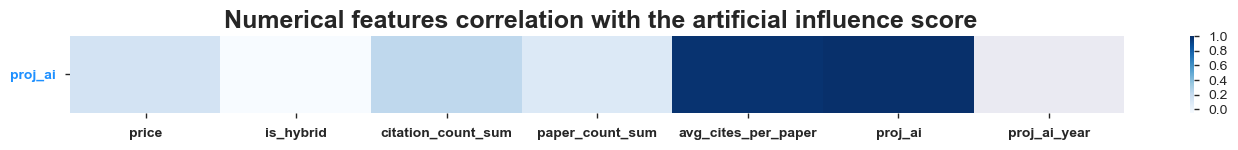

In [20]:
num=dffinal.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['proj_ai'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the artificial influence score", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [20]:
dffinal = dffinal.drop(['url', 'issn', 'category', 'proj_ai_year'], axis=1)

In [21]:
dffinal = dffinal.reset_index(drop=True)

In [22]:
# diwmmv - drop indices with most missing values
def diwmmv(dataframe):
    indices_to_drop = []
#     print(len(dataframe.index))
    for i in range(len(dataframe.index)) :
        if dataframe.iloc[i].isnull().sum() > 0:
            print("Nan in row ", i , " : " ,  dataframe.iloc[i].isnull().sum())
            indices_to_drop.append(i)
      
#     return indices_to_drop
    df_upd = dataframe.drop(indices_to_drop)
    return df_upd

In [23]:
df_final = diwmmv(dffinal)

Nan in row  310  :  4
Nan in row  664  :  1
Nan in row  1096  :  4
Nan in row  1639  :  4
Nan in row  1892  :  4


In [24]:
df_final.shape

(2344, 9)

In [25]:
df_final.isnull().sum().sort_values(ascending=False)

proj_ai                0
avg_cites_per_paper    0
paper_count_sum        0
citation_count_sum     0
is_hybrid              0
pub_name               0
price_date_stamp       0
price                  0
journal_name           0
dtype: int64

In [26]:
pandas_profiling.ProfileReport(df_final)

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,2344
Total Missing (%),0.0%
Total size in memory,183.2 KiB
Average record size in memory,80.1 B
Numeric,4
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [27]:
df_final = df_final.drop(['journal_name', 'avg_cites_per_paper'], axis=1)

In [28]:
df_final.sample(10)

,price,price_date_stamp,pub_name,is_hybrid,citation_count_sum,paper_count_sum,proj_ai
1746,3000,2016-08-11,Springer,1,379.0,177.0,0.484
2248,3000,2016-08-11,Springer,1,193.0,144.0,0.269
884,0,2012-01-01,Salud Mental,0,199.0,223.0,0.161
1791,3000,2016-08-11,Springer,1,4830.0,1503.0,0.807
1372,3000,2016-08-11,Springer,1,150.0,103.0,0.298
1116,600,2016-08-11,Hindawi Publishing Corporation,0,52.0,59.0,0.158
1758,3000,2016-08-11,Springer,1,934.0,485.0,0.424
2075,3000,2016-08-11,Springer,1,179.0,223.0,0.141
2158,3000,2016-08-11,Springer,1,118.0,126.0,0.171
298,3000,2016-08-11,Elsevier,1,433.0,250.0,0.371


In [29]:
df_final['price_date_stamp'].value_counts()

2016-08-11    1560
2013-01-01     510
2012-01-01     274
Name: price_date_stamp, dtype: int64

In [30]:
from datetime import date
from datetime import datetime
df_final['price_date_stamp'] = pd.to_datetime(df_final['price_date_stamp'], infer_datetime_format=True)
curr_time = pd.to_datetime("now")
df_final['price_date_stamp_in_days'] = df_final['price_date_stamp'] - curr_time
df_final['price_date_stamp_in_days'] = df_final['price_date_stamp_in_days'] /np.timedelta64(1,'D')
df_final['price_date_stamp_in_days'] = abs(df_final['price_date_stamp_in_days']).astype(int)

In [31]:
df_final = df_final.drop('price_date_stamp', axis=1)

In [32]:
df_final.head()

,price,pub_name,is_hybrid,citation_count_sum,paper_count_sum,proj_ai,price_date_stamp_in_days
0,1625,BioMed Central Ltd,0,632.0,196.0,0.810,3088
1,2000,Biomed Central,0,960.0,280.0,0.875,2722
2,2000,Biomed Central,0,116.0,51.0,0.522,2722
3,2055,BioMed Central Ltd,0,409.0,89.0,1.265,3088
4,2000,Biomed Central,0,13637.0,3428.0,1.055,2722


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_final['pub_name'] = label_encoder.fit_transform(df_final['pub_name'])

df_final.sample(10)

,price,pub_name,is_hybrid,citation_count_sum,paper_count_sum,proj_ai,price_date_stamp_in_days
1320,3000,269,1,479.0,171.0,0.679,1404
1687,3000,269,1,401.0,189.0,0.479,1404
662,0,247,0,158.0,99.0,0.334,2722
1703,3000,269,1,203.0,104.0,0.431,1404
1091,1500,111,0,102.0,88.0,0.224,1404
785,0,172,0,229.0,176.0,0.259,3088
365,750,111,0,28.0,40.0,0.119,1404
1050,800,112,0,262.0,74.0,0.911,1404
706,1700,125,0,898.0,344.0,0.621,2722
213,2500,84,0,2715.0,791.0,0.876,1404


Text(0.5, 1.0, 'paper_count_sum - artificial influence of journal scatter plot')

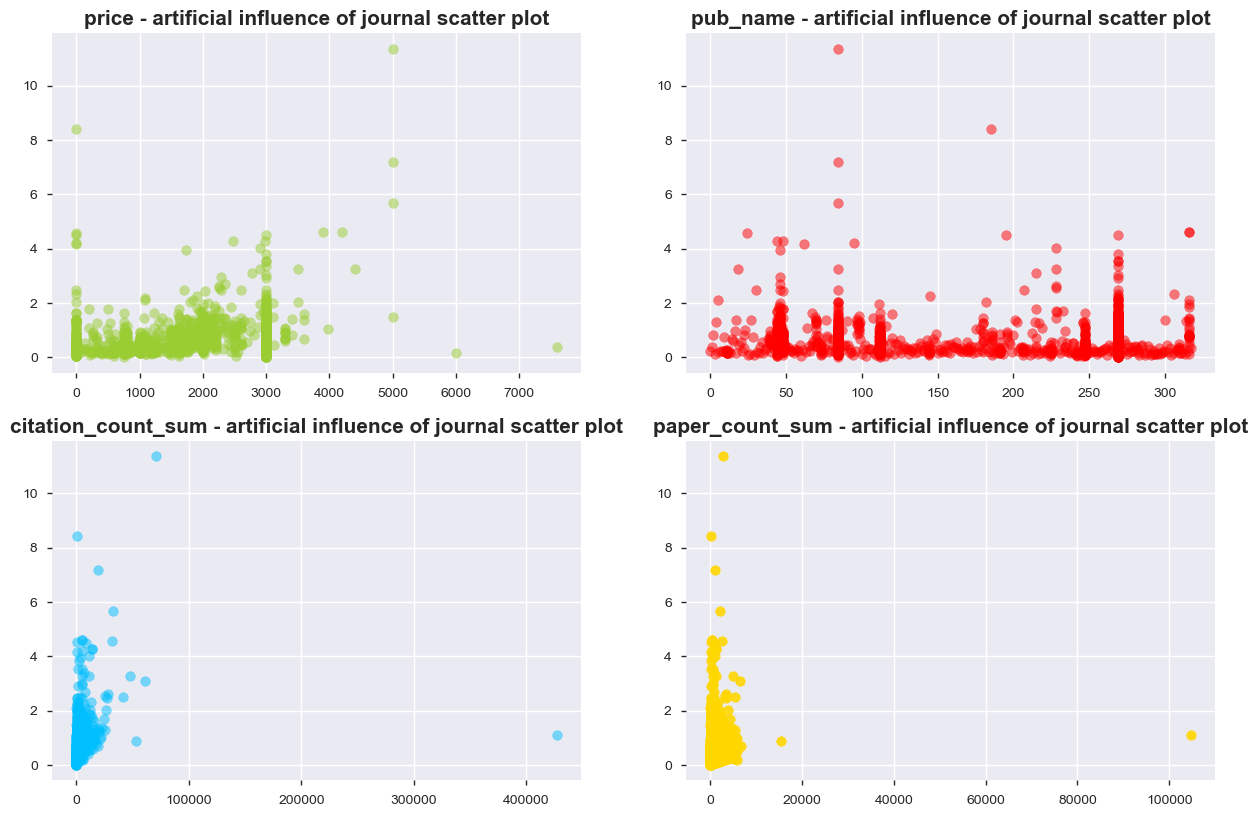

In [34]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df_final['price'], y=df_final['proj_ai'], color=('yellowgreen'), alpha=0.5)
# plt.axvline(x=4600, color='r', linestyle='-')
plt.title('price - artificial influence of journal scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df_final['pub_name'], y=df_final['proj_ai'], color=('red'),alpha=0.5)
# plt.axvline(x=5900, color='r', linestyle='-')
plt.title('pub_name - artificial influence of journal scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df_final['citation_count_sum'], y=df_final['proj_ai'], color=('deepskyblue'),alpha=0.5)
# plt.axvline(x=4000, color='r', linestyle='-')
plt.title('citation_count_sum - artificial influence of journal scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df_final['paper_count_sum'], y=df_final['proj_ai'], color=('gold'),alpha=0.9)
# plt.axvline(x=1500, color='r', linestyle='-')
plt.title('paper_count_sum - artificial influence of journal scatter plot', fontsize=15, weight='bold' )

In [35]:
df_final['citation_count_sum'].sort_values(ascending=False).head(2)

856    426949.0
214     70745.0
Name: citation_count_sum, dtype: float64

In [36]:
df_final['paper_count_sum'].sort_values(ascending=False).head(2)

856    104705.0
833     15348.0
Name: paper_count_sum, dtype: float64

In [37]:
shape_before = df_final.shape
df_final=df_final[(df_final['citation_count_sum'] < 400000) & (df_final['paper_count_sum'] < 100000)]
print('We removed ',shape_before[0] - df_final.shape[0],'outliers')

We removed  1 outliers


In [38]:
# Shuffle your dataset 
train_shuffled = df_final.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(df_final))

# Split your dataset 
train_set = train_shuffled[:train_size]
test_set = train_shuffled[train_size:]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
#For training and validating purposes
X = train_set.drop('proj_ai', axis=1)
y = train_set['proj_ai']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# XGBoost regressor

In [41]:
# conda install -c anaconda py-xgboost

In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.2)
kfold = KFold(n_splits=5, shuffle=True)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

[17:22:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [44]:
xgb_scores = -1 * cross_val_score(xgb_model, X_train, y_train,
                              cv=kfold,
                              scoring='neg_mean_absolute_error')
print("MAE scores:\n", xgb_scores.mean())

[17:23:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE scores:
 0.058991280642618424


In [45]:
# For testing purposes
X_test = test_set.drop('proj_ai', axis=1)
y_test = test_set['proj_ai']

In [46]:
xgb_predictions = xgb_model.predict(X_test)

print("Mean Absolute Error: " + str(mean_absolute_error(xgb_predictions, y_test)))

Mean Absolute Error: 0.05933704332197145


# Multilayer Perceptron Regressor 

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_valid_norm = norm.transform(X_valid)

In [50]:
X_train_norm

array([[0.39525692, 0.84810127, 1.        , 0.00147009, 0.03333843,
        0.        ],
       [0.39525692, 0.84810127, 1.        , 0.13072487, 0.60024469,
        0.        ],
       [0.4743083 , 0.26265823, 1.        , 0.27360624, 0.60269154,
        0.        ],
       ...,
       [0.39525692, 0.84810127, 1.        , 0.00340665, 0.01697507,
        0.        ],
       [0.        , 0.15189873, 0.        , 0.00323702, 0.01682214,
        0.78266033],
       [0.39525692, 0.84810127, 1.        , 0.12173471, 0.32956109,
        0.        ]])

In [51]:
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()

scale = StandardScaler().fit(X_train_scaled)

X_train_scaled = scale.transform(X_train_scaled)

X_valid_scaled = scale.transform(X_valid_scaled)

In [52]:
X_train_scaled

array([[ 0.76760575,  0.72084558,  0.91857958, -0.35763305, -0.3854269 ,
        -0.69768101],
       [ 0.76760575,  0.72084558,  0.91857958,  1.89597454,  4.71478603,
        -0.69768101],
       [ 1.26606076, -1.31902596,  0.91857958,  4.38716718,  4.73679936,
        -0.69768101],
       ...,
       [ 0.76760575,  0.72084558,  0.91857958, -0.32386837, -0.53264103,
        -0.69768101],
       [-1.7246693 , -1.70494761, -1.08863731, -0.32682586, -0.53401687,
         1.20887717],
       [ 0.76760575,  0.72084558,  0.91857958,  1.73922755,  2.27956162,
        -0.69768101]])

In [53]:
from sklearn.neural_network import MLPRegressor

In [54]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100, 75, 50, 25), random_state=1, 
                         max_iter=1000, activation='relu', solver = 'adam', 
                         learning_rate = 'adaptive')

In [55]:
mae = []

trainX = [X_train, X_train_norm, X_train_scaled]
ValidX = [X_valid, X_valid_norm, X_valid_scaled]

In [56]:
for i in range(len(trainX)):
    # fit
    mlp_model.fit(trainX[i], y_train)
    # predict
    pred = mlp_model.predict(ValidX[i])
    # MAE
    mae.append(mean_absolute_error(y_valid, pred))

In [57]:
df_mlp = pd.DataFrame({'MAE':mae},index=['Original','Normalized','Standardized'])

In [58]:
df_mlp

,MAE
Original,1.552186
Normalized,0.127373
Standardized,0.076758


In [61]:
mlp_model.fit(X_train_scaled, y_train)
pred = mlp_model.predict(X_valid_scaled)
print(mean_absolute_error(y_valid, pred))

0.07675769250989387


In [62]:
X_test_scaled = X_test.copy()

scale2 = StandardScaler().fit(X_test_scaled)

X_test_scaled = scale.transform(X_test_scaled)

In [63]:
mlp_predictions = mlp_model.predict(X_test_scaled)

print("Mean Absolute Error: " + str(mean_absolute_error(mlp_predictions, y_test)))

Mean Absolute Error: 0.06537031672865481


In [66]:
y_test

1023    0.671
648     0.285
695     0.680
1738    0.372
1058    0.753
        ...  
179     1.101
1139    0.134
563     0.551
591     1.249
1605    0.964
Name: proj_ai, Length: 469, dtype: float64

In [67]:
proj_ai_scores=pd.DataFrame({'Predicted Article Influence Score using MLP':mlp_predictions,
                             'Real Article Influence Score':y_test,
                             'Predicted Article Influence Score using XGBoost': xgb_predictions})

In [69]:
proj_ai_scores.sample(20)

,Predicted Article Influence Score using MLP,Real Article Influence Score,Predicted Article Influence Score using XGBoost
563,0.564569,0.551,0.551373
776,0.225156,0.128,0.159843
669,0.933292,0.928,0.958026
372,0.377614,0.250,0.240118
1954,0.130543,0.135,0.169515
425,0.323392,0.349,0.380810
2239,0.739524,0.778,0.823965
1604,1.262257,1.291,1.564502
162,1.072781,1.144,1.083268
562,0.545157,0.287,0.293701
